In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def compute_angles(w):
    w = w/np.linalg.norm(w, axis=-1, keepdims=True)
    gram = w.dot(w.T)
    gram_off_diag = gram[np.tri(gram.shape[0], k=-1, dtype=bool)]
    return np.arccos(abs(gram_off_diag))/np.pi*180

def gram(w):
    w = w/np.linalg.norm(w, axis=-1, keepdims=True)
    return w.dot(w.T)

('old', 59.172360300854201)
('new', 70.390192035873326)


(0, 90)

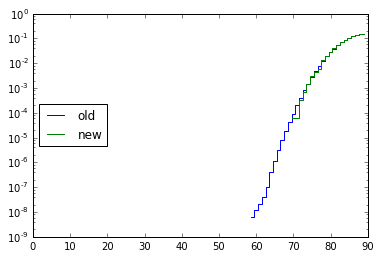

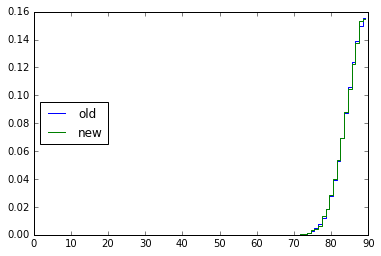

In [71]:
n_mixtures = 128
OC = 2
n_sources = OC * n_mixtures
multiplier = 100

w = np.random.randn(multiplier * n_sources, n_mixtures)
g = gram(w)
g = g - np.eye(g.shape[0])
g_max = g.max(axis=1)
g_sort = np.argsort(g_max)
wp = w[g_sort[:n_sources]]

angles = compute_angles(w)
vals, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('old', angles.min())

anglesp = compute_angles(wp)
valsp, binsp = np.histogram(anglesp, bins=np.arange(0, 91), density=True)
print('new', anglesp.min())

plt.figure()
plt.semilogy(bins[:-1], vals, drawstyle='steps-mid', label='old')
plt.semilogy(bins[:-1], valsp, drawstyle='steps-mid', label='new')
plt.legend(loc='center left')
plt.xlim([0, 90])

plt.figure()
plt.plot(bins[:-1], vals, drawstyle='steps-mid', label='old')
plt.plot(bins[:-1], valsp, drawstyle='steps-mid', label='new')
plt.legend(loc='center left')
plt.xlim([0, 90])

/home/jesse/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0, 90)

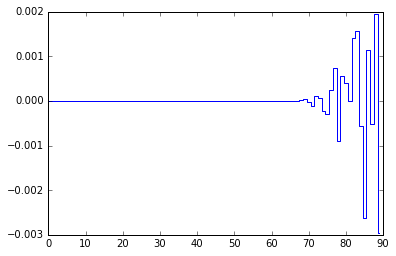

In [43]:
plt.figure()
plt.plot(bins[:-1], valsp-vals, drawstyle='steps-mid')
plt.legend(loc='center left')
plt.xlim([0, 90])

In [ ]:
plt.figure()
for ii in range(7):
    for jj in range(200):
        g_max = g.max(axis=1)
        arg_max = np.argmax(g_max)
        w = np.delete(w, arg_max, axis=0)
        g = np.delete(g, arg_max, axis=0)
        g = np.delete(g, arg_max, axis=1)
    angles = compute_angles(w)
    print(angles.min())
    vals, bins = np.histogram(angles, bins=np.arange(0, 91))
    hists.append(vals)

(0, 90)

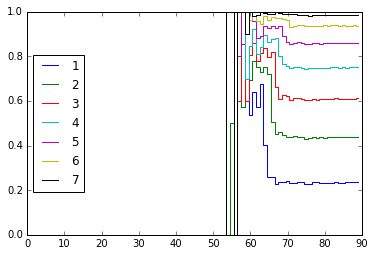

In [42]:
for ii in range(len(hists)-1):
    plt.plot(bins[:-1], (hists[0]-hists[ii+1])/(hists[0]+1e-3), drawstyle='steps-mid', label=str(ii+1))
#plt.yscale('log')
plt.legend(loc='center left')
plt.xlim([0, 90])

(0, 90)

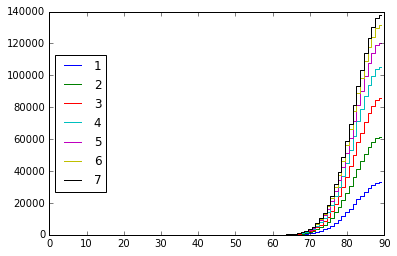

In [45]:
for ii in range(len(hists)-1):
    plt.plot(bins[:-1], (hists[ii]-hists[ii+1]), drawstyle='steps-mid', label=str(ii+1))
#plt.yscale('log')
plt.legend(loc='center left')
plt.xlim([0, 90])

# Coherence Cost

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from oc_ica import analysis
from oc_ica.analysis import compute_angles
from oc_ica.optimizers.ica_optimizers import sgd, momentum, adam

In [2]:
def gram(w):
    w = w/np.linalg.norm(w, axis=-1, keepdims=True)
    return w.dot(w.T)

In [3]:
kwargs = {}
n_sources = 64
n_mixtures = 32

In [4]:
reload(analysis)

kwargs['optimizer'] = 'sgd'
kwargs['learning_rule'] = sgd
w, w0 = analysis.evaluate_dgcs(['random'], ['COHERENCE'],
                      n_sources=n_sources, n_mixtures=n_mixtures, **kwargs)
w = np.squeeze(w)
w0 = np.squeeze(w0)

kwargs['optimizer'] = 'L-BFGS-B'
kwargs['learning_rule'] = None
wb = np.squeeze(analysis.evaluate_dgcs(['random'], ['COHERENCE_SOFT'],
                              n_sources=n_sources, n_mixtures=n_mixtures, **kwargs)[0])

w4, _ = analysis.evaluate_dgcs(['random'], ['L4'],
                      n_sources=n_sources, n_mixtures=n_mixtures)
w4 = np.squeeze(w4)

Overcomplete ICA
Degeneracy control: COHERENCE
50000
('epoch', 685648)
ICA with SGD done!685648
Final loss value: 0.141533300281
Overcomplete ICA
Degeneracy control: COHERENCE_SOFT
ICA with L-BFGS-B done!
Final loss value: 0.0
Overcomplete ICA
Degeneracy control: L4
ICA with L-BFGS-B done!
Final loss value: 0.279065668583


('coherence sgd', 81.856362685786635)
('coherence bfgs', 79.544200187781925)
('L4 bfgs', 80.40396305094356)
('original', 49.542378291042752)


(45, 90)

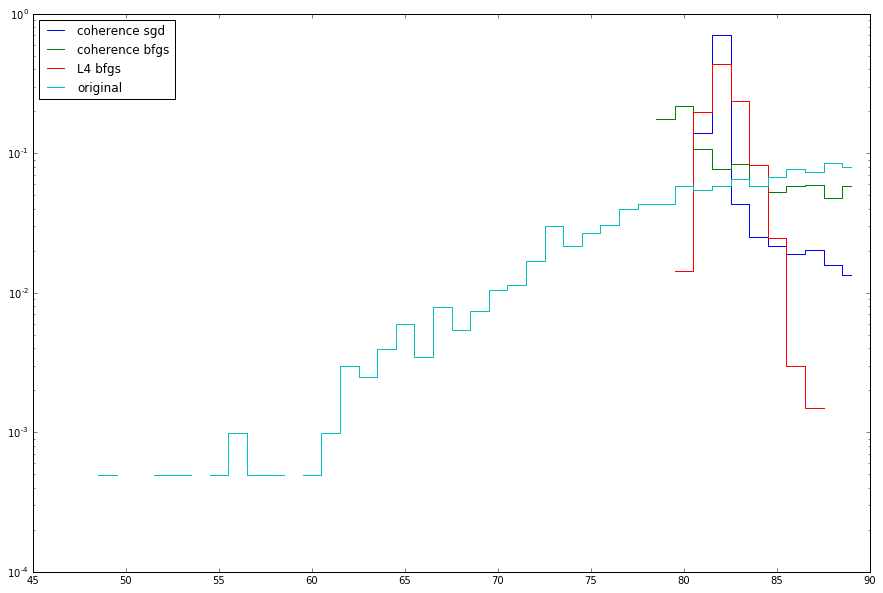

In [5]:
plt.figure(figsize=(15, 10))

angles = compute_angles(w)
vals1, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence sgd', angles.min())
plt.semilogy(bins[:-1], vals1, drawstyle='steps-mid', label='coherence sgd')

angles = compute_angles(wb)
vals2, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence bfgs', angles.min())
plt.semilogy(bins[:-1], vals2, drawstyle='steps-mid', label='coherence bfgs')

angles = compute_angles(w4)
vals4, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('L4 bfgs', angles.min())
plt.semilogy(bins[:-1], vals4, drawstyle='steps-mid', label='L4 bfgs')

angles = compute_angles(w0)
vals3, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('original', angles.min())
plt.semilogy(bins[:-1], vals3, drawstyle='steps-mid', label='original')

plt.legend(loc='upper left')
plt.xlim([45, 90])

In [8]:
sorted(compute_angles(w))

[78.648208793144676,
 78.6881668821094,
 78.777976913481112,
 78.830240616330059,
 78.831884854431053,
 78.835131590125471,
 78.838812955093132,
 78.839386844305977,
 78.840839542720261,
 78.847301908301887,
 78.8474099053674,
 78.848281196137322,
 78.850747040377271,
 78.867234726018268,
 78.86792958125092,
 78.886971599855698,
 78.893604894247844,
 78.899336644482034,
 78.89985736728886,
 78.90210704502411,
 78.909787102402134,
 78.912879869119251,
 78.928610009070525,
 78.947763265607875,
 78.955868322726431,
 78.9613992318382,
 78.9644126280525,
 78.967537336762334,
 78.972525472591798,
 78.975759680005282,
 78.979892590157661,
 78.981582243879402,
 78.982728971765297,
 78.984648576923718,
 78.986977334593789,
 78.993427110984896,
 78.995382485816862,
 78.997567702605821,
 79.00025235542779,
 79.006480680928632,
 79.012711992691592,
 79.013688755328971,
 79.02333468210665,
 79.026634199842846,
 79.032566265135117,
 79.043301570445252,
 79.043707328011621,
 79.043865004135043,
 79.0

In [9]:
sorted(compute_angles(wb))

[79.544200187781925,
 79.548360292211711,
 79.549663303467739,
 79.550055689993627,
 79.550956902672112,
 79.552464544226538,
 79.554153328024142,
 79.555706185175168,
 79.557614633197389,
 79.563430984376211,
 79.564715068718726,
 79.564899779667613,
 79.569800949406584,
 79.573225527533268,
 79.573897318833971,
 79.576793518657595,
 79.578065515148083,
 79.584309563501478,
 79.584799028513046,
 79.585678787422893,
 79.586985840354785,
 79.587946962652808,
 79.598485711125363,
 79.600945658405607,
 79.601831752004856,
 79.601933920080683,
 79.602174489572548,
 79.602833185264899,
 79.605540882833992,
 79.606614768301526,
 79.607739479355203,
 79.60787109861451,
 79.609619299589966,
 79.61003113360357,
 79.6102547716131,
 79.611155054570304,
 79.611558869283513,
 79.612089535699198,
 79.613180640514003,
 79.613533372984492,
 79.617625315444073,
 79.620625692659374,
 79.621301387621571,
 79.621702111527512,
 79.62366628107992,
 79.624024590766396,
 79.624909223014981,
 79.63152268316750